# EDA-Project 1

Это ваш первый проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"foreign_exchange_rates.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с подде, визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [26]:
# Загружаем данные по курсам валют за 20 лет
rates = pd.read_csv('foreign_exchange_rates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
rates.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [46]:
# Посмотрим какие у нас валюты и выделим в отдельный столбец год для группировки статистики по годам
valutes = rates.columns.tolist()[1:-1]
rates['year'] = rates['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
valutes

['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'EURO AREA - EURO/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'BRAZIL - REAL/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'CHINA - YUAN/US$',
 'HONG KONG - HONG KONG DOLLAR/US$',
 'INDIA - INDIAN RUPEE/US$',
 'KOREA - WON/US$',
 'MEXICO - MEXICAN PESO/US$',
 'SOUTH AFRICA - RAND/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'DENMARK - DANISH KRONE/US$',
 'JAPAN - YEN/US$',
 'MALAYSIA - RINGGIT/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'SWITZERLAND - FRANC/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$']

In [4]:
# Соберём статистику по валютам. Минимальные, максимальные значения за весь имеющийся период
# Соберём разницу между максимальным и минимальным значением, это насколько валюта стабильна
# Чем меньше разница, тем стабилнее валюта

valutes_min = []
valutes_max = []
valutes_delta = []
valutes_mean = []
dict_values_st = {}

def valute_st(data, valute):
    # Очистка и подготовка данных
    valute_date = data[data[valute] != 'ND']
    valute_date[valute] = valute_date[valute].astype(float)
    
    # Подсчет статистических данных
    valute_min = valute_date[valute].min()
    valute_max = valute_date[valute].max()
    valute_delta = valute_date[valute].max() - valute_date[valute].min()
    valute_mean = valute_date[valute].mean()
    
    # Запись статистических данных
    valutes_min.append(valute_min)
    valutes_max.append(valute_max)
    valutes_delta.append(valute_delta)
    valutes_mean.append(valute_mean)
    
    # Создание словаря обобщающего статистические данные
    # Словарь нужен для сортировки валют по статистическим показателям
    dict_values_st[valute] = [['valute_min',valute_min],['valute_max',valute_max],['valute_delta',valute_delta],['valute_mean',valute_mean]]
    
for val in valutes:
    valute_st(rates, val)

<ipython-input-4-3b4b1a7e401a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valute_date[valute] = valute_date[valute].astype(float)


In [5]:
# Сортировка валют по разнице между максимальным и минимальным значением / 'valute_delta'
# Показывает наиболее стабильные валюты, чьи колебания за 20 лет минимальны
list_v = list(dict_values_st.items())
list_v.sort(key=lambda i: i[1][2][1])

# Список валют отсортированный по коллебаниям курса от наименьшего к наибольшему
list_valute_sort = []

for i in range(len(list_v)):
    list_valute_sort.append(list_v[i][0])
list_valute_sort

['HONG KONG - HONG KONG DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'EURO AREA - EURO/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'SWITZERLAND - FRANC/US$',
 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'MALAYSIA - RINGGIT/US$',
 'CHINA - YUAN/US$',
 'BRAZIL - REAL/US$',
 'DENMARK - DANISH KRONE/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$',
 'SOUTH AFRICA - RAND/US$',
 'MEXICO - MEXICAN PESO/US$',
 'INDIA - INDIAN RUPEE/US$',
 'JAPAN - YEN/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'KOREA - WON/US$']

In [6]:
# Отсортированные по колебаниям валюты со статистическими показателями
list_v

[('HONG KONG - HONG KONG DOLLAR/US$',
  [['valute_min', 7.7085],
   ['valute_max', 7.8499],
   ['valute_delta', 0.14139999999999997],
   ['valute_mean', 7.782637955768076]]),
 ('UNITED KINGDOM - UNITED KINGDOM POUND/US$',
  [['valute_min', 0.4738],
   ['valute_max', 0.8287],
   ['valute_delta', 0.3549],
   ['valute_mean', 0.6403719864514823]]),
 ('EURO AREA - EURO/US$',
  [['valute_min', 0.6246],
   ['valute_max', 1.2092],
   ['valute_delta', 0.5846],
   ['valute_mean', 0.8439044032675848]]),
 ('SINGAPORE - SINGAPORE DOLLAR/US$',
  [['valute_min', 1.2007],
   ['valute_max', 1.854],
   ['valute_delta', 0.6533],
   ['valute_mean', 1.4803983462841217]]),
 ('CANADA - CANADIAN DOLLAR/US$',
  [['valute_min', 0.9168],
   ['valute_max', 1.6128],
   ['valute_delta', 0.6960000000000001],
   ['valute_mean', 1.2303378561466438]]),
 ('SWITZERLAND - FRANC/US$',
  [['valute_min', 0.7296],
   ['valute_max', 1.825],
   ['valute_delta', 1.0954],
   ['valute_mean', 1.1504612871089859]]),
 ('AUSTRALIA - A

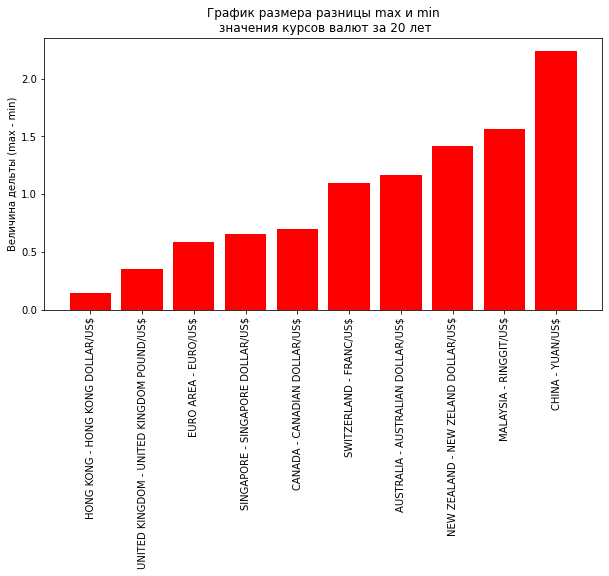

In [149]:
# График размера колебаний 10 самых стабильных валют
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
valutes_delta = []
x = list(x for x in range(10))
years = rates['year'].unique().tolist()
for i,v in enumerate(list_valute_sort[:-11]):
    valutes_delta.append(list_v[i][1][2][1])
#print(valutes_delta)
ax.bar(x,height=valutes_delta, color='red')
ax.set_xticks(x)
ax.set_xticklabels(list_valute_sort[:-11], rotation=90)
ax.set_title('График размера разницы max и min\n значения курсов валют за 20 лет')
ax.set_ylabel('Величина дельты (max - min)')
plt.show()

In [ ]:
'''
Построим диаграммы размаха на каждую из 10 валют по годам
Чтобы посмотреть детальнее, как сильно изменялся курс
На диаграммах должны быть заметны экономически сложные года 2008, 2015 
Именно в 2015 рубль упал к доллару с 30 до 60 руб за доллар
'''

In [144]:
def boxplot_years(data, currency):
    cur_data = data[['Time Serie', currency]]
    cur_data = cur_data[cur_data[currency] != 'ND']
    cur_data[currency] = cur_data[currency].astype(float)
    cur_data['year'] = cur_data['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)

    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    years = cur_data['year'].unique().tolist()

    box = []
    for year in years:
        box.append(cur_data[cur_data['year'] == year][currency])
    ax1.boxplot(box)
    ax1.set_xticklabels(years, rotation=45)
    ax1.set_title(f'Колебания курса по годам {currency}')
    ax1.set_ylabel('Можно купить на 1 доллар')


    box_us = []
    cur_data['US'] = 1/cur_data[currency]
    for year in years:
        box_us.append(cur_data[cur_data['year'] == year]['US'])
    ax2.boxplot(box_us)
    ax2.set_xticklabels(years, rotation=45)
    ax2.set_title(f'US DOLLAR / {currency[:-4]}')
    ax2.set_ylabel(f'Можно купить на 1 {currency.split("-")[1][:-4]}')

    plt.show()

In [ ]:
for currency in list_valute_sort[:5]:
    if currency == 'Time Serie':
        pass
    boxplot_years(rates, currency)

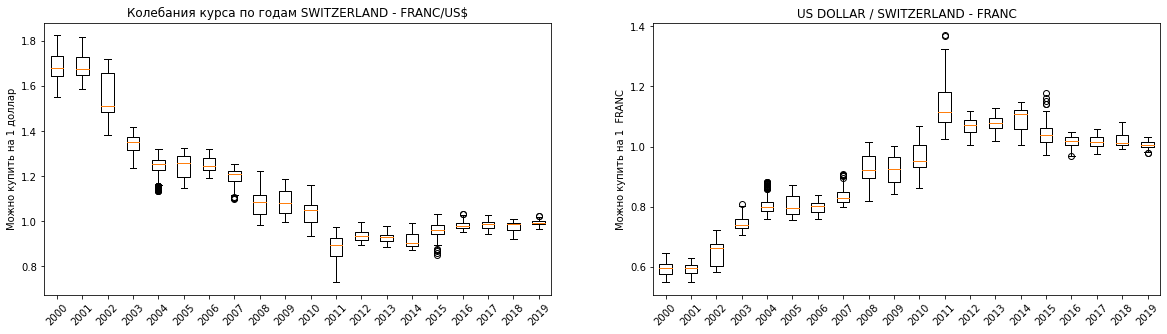

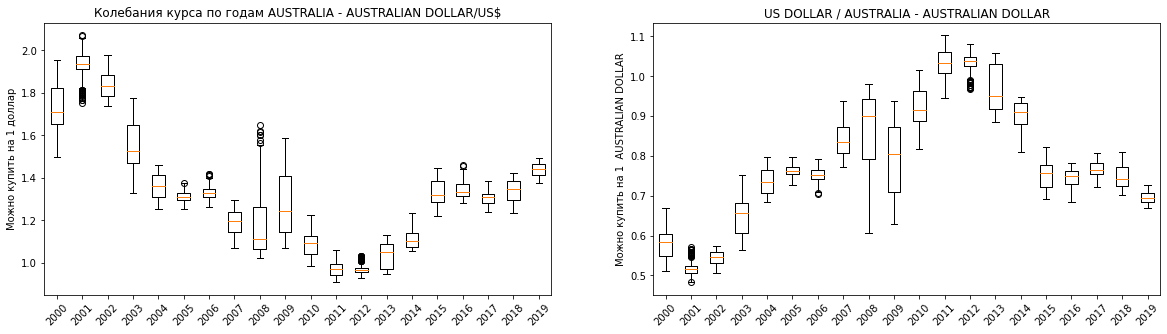

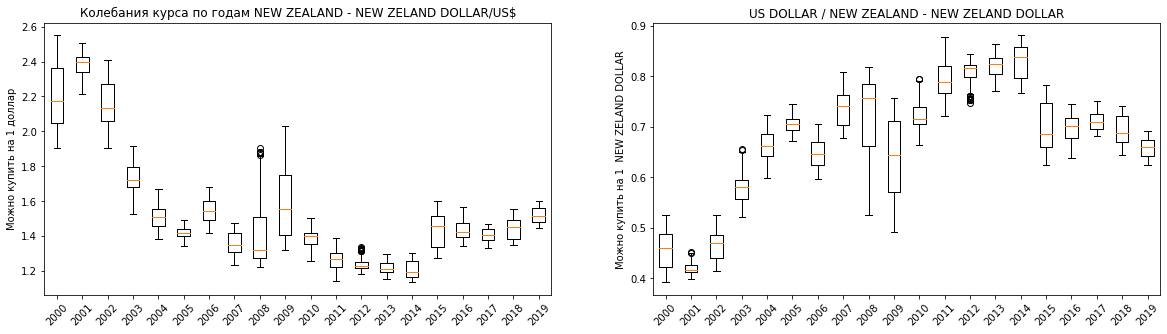

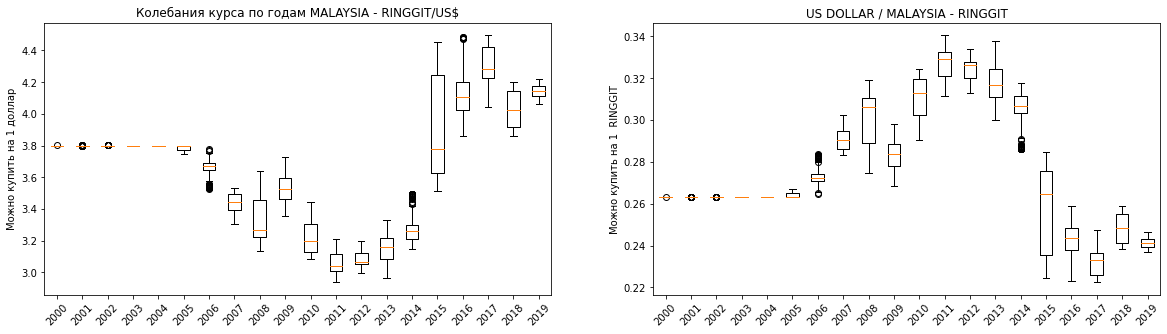

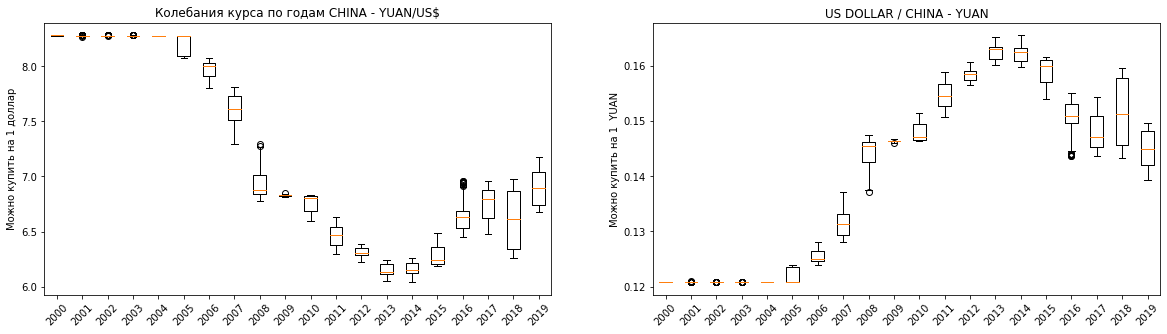

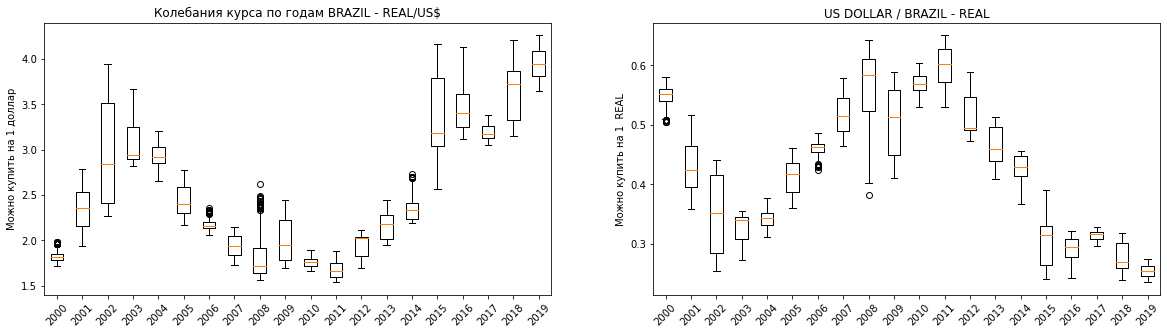

In [141]:
for currency in list_valute_sort[5:11]:
    if currency == 'Time Serie':
        pass
    boxplot_years(rates, currency)

In [ ]:
"""
На каждую валюту мы построили два графика
________________________________________________________
Первый отношение валюты к доллару
 
Примеры: 
валюта 0.5 - значит, за 1 валюту можно купить 2 доллара
валюта 10 - значит, за 10 ед. валюты можно купить 1 доллар

Вывод:
Чем меньше значение валюты к доллару, тем крепче валюта
Хорошо если первый график ровный или идёт на спад

________________________________________________________
Второй отношение доллара к валюте

Примеры: 
доллар 0.5 - значит, за 1 доллар можно купить 2 валюты
доллар 10 - значит, за 10 долларов можно купить 1 валюту

Вывод:
Чем больше значение доллара к валюте, тем валюта сильнее
Хорошо если второй график ровный или идёт на повышение

"""

In [63]:
best_list = ['SINGAPORE - SINGAPORE DOLLAR/US$', 'SWITZERLAND - FRANC/US$', 'CHINA - YUAN/US$', 'HONG KONG - HONG KONG DOLLAR/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$']

In [32]:
for best in list_valute_sort[:-11]:
    print(best)
     
    #  курс валюты 2000-01-03
    first = float(rates[best].iloc[0])
    
    # курс валюты 2019-12-31
    last = float(rates[best].iloc[-1])
    
    # На сколько процентов выросла/упала валюта
    procentage = (first-last)/(first/100)

    print(f'2000-01-03 = {rates[best].iloc[0]}')
    print(f'2019-12-31 = {rates[best].iloc[-1]}')

    if procentage > 0:
        print(f'за 20 лет курс укрепился на {procentage} %')
    else:
        print(f'за 20 лет курс ослаб на {abs(procentage)} %')
        
    print()

HONG KONG - HONG KONG DOLLAR/US$
2000-01-03 = 7.7765
2019-12-31 = 7.7894
за 20 лет курс ослаб на 0.1658843952935028 %

UNITED KINGDOM - UNITED KINGDOM POUND/US$
2000-01-03 = 0.6146
2019-12-31 = 0.7536
за 20 лет курс ослаб на 22.61633582818093 %

EURO AREA - EURO/US$
2000-01-03 = 0.9847
2019-12-31 = 0.8907
за 20 лет курс укрепился на 9.546054635929723 %

SINGAPORE - SINGAPORE DOLLAR/US$
2000-01-03 = 1.6563
2019-12-31 = 1.3446
за 20 лет курс укрепился на 18.81905451910886 %

CANADA - CANADIAN DOLLAR/US$
2000-01-03 = 1.4465
2019-12-31 = 1.2962
за 20 лет курс укрепился на 10.390597995160725 %

SWITZERLAND - FRANC/US$
2000-01-03 = 1.5808
2019-12-31 = 0.9677
за 20 лет курс укрепился на 38.78415991902834 %

AUSTRALIA - AUSTRALIAN DOLLAR/US$
2000-01-03 = 1.5172
2019-12-31 = 1.4225
за 20 лет курс укрепился на 6.241761138940153 %

NEW ZEALAND - NEW ZELAND DOLLAR/US$
2000-01-03 = 1.9033
2019-12-31 = 1.4826
за 20 лет курс укрепился на 22.103714600956238 %

MALAYSIA - RINGGIT/US$
2000-01-03 = 3.8
2

In [64]:
data_2019 = rates[rates['year'] == 2019]
data_2019.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,year
4956,2019-01-01,ND,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,2019
4957,2019-01-02,1.4286,0.8805,1.4997,0.7938,3.8123,1.3591,6.8597,7.835,70.02,...,6.5748,109.22,4.135,8.6976,8.9931,182.8,0.9884,30.78,32.26,2019
4958,2019-01-03,1.4257,0.8773,1.4954,0.7916,3.7429,1.3484,6.8708,7.8308,70.12,...,6.5505,108.07,4.141,8.694,9.0004,182.65,0.9889,30.86,32.19,2019
4959,2019-01-04,1.4069,0.8764,1.483,0.7849,3.7149,1.3399,6.8663,7.8339,69.63,...,6.5448,108.29,4.134,8.6109,8.9488,182.5,0.9859,30.8,32,2019
4960,2019-01-07,1.4,0.872,1.4789,0.7839,3.71,1.3297,6.8501,7.8348,69.78,...,6.5116,108.62,4.113,8.5387,8.9013,182.1,0.981,30.8,31.96,2019


In [65]:
data_2019['month'] = data_2019['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
data_2019['month'].unique().tolist()

<ipython-input-65-22a25ac8a28b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['month'] = data_2019['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

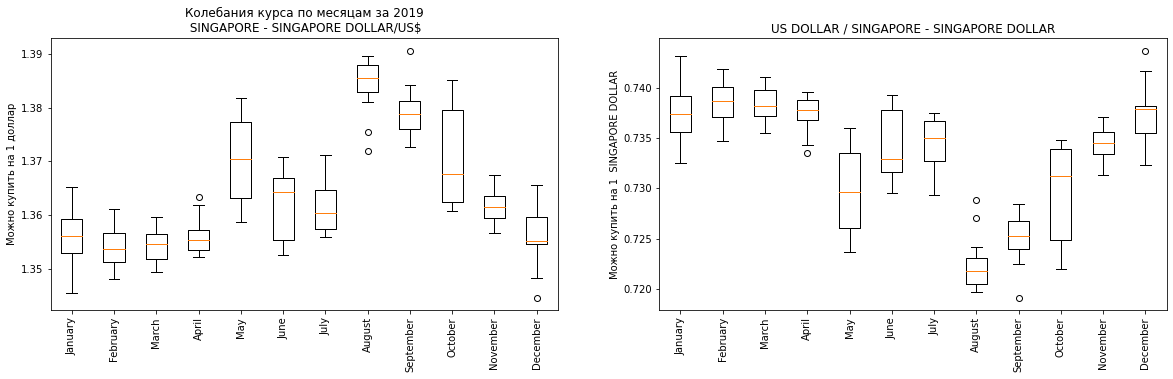

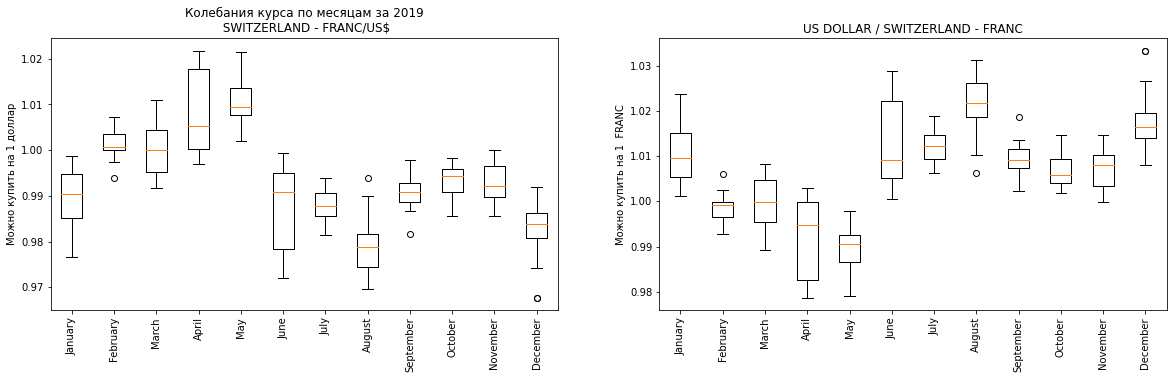

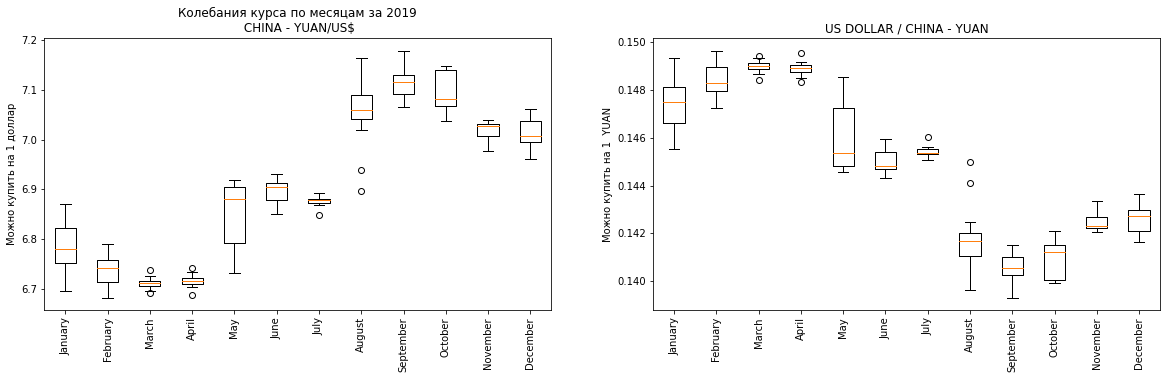

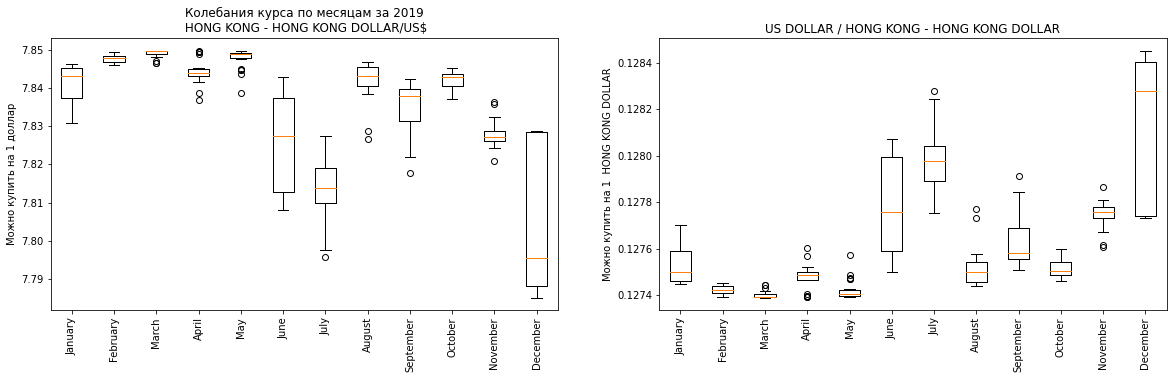

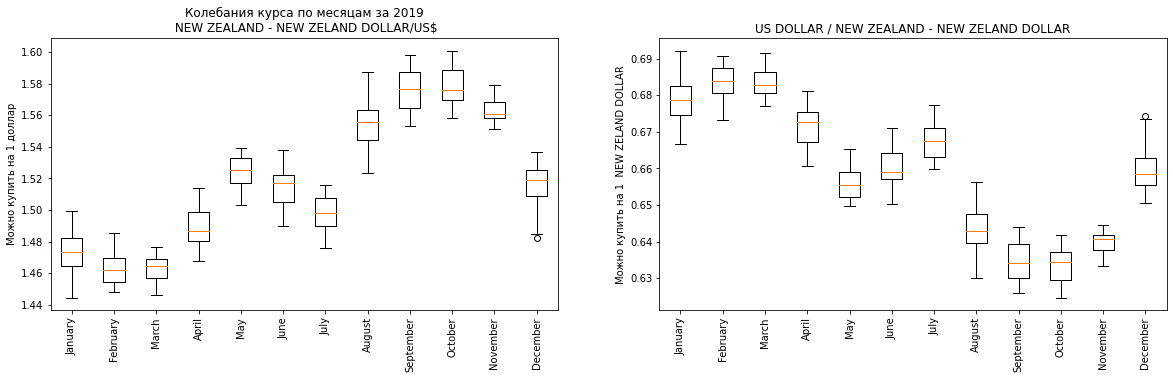

In [135]:
data_2019_best = data_2019[best_list]
def boxplot_monthes(data, currency):
    cur_data = data[['Time Serie', currency]]
    cur_data = cur_data[cur_data[currency] != 'ND']
    cur_data[currency] = cur_data[currency].astype(float)
    cur_data['year'] = cur_data['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
    cur_data['month'] = cur_data['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
    
    monthes = cur_data['month'].unique().tolist()
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    box = []
    for month in monthes:
        box.append(cur_data[cur_data['month'] == month][currency])

    ax1.boxplot(box)
    ax1.set_xticklabels(months, rotation=90)
    ax1.set_title(f'Колебания курса по месяцам за 2019\n {currency}')
    ax1.set_ylabel('Можно купить на 1 доллар')


    box_us = []
    cur_data['US'] = 1/cur_data[currency]
    for month in monthes:
        box_us.append(cur_data[cur_data['month'] == month]['US'])
    ax2.boxplot(box_us)
    ax2.set_xticklabels(months, rotation=90)
    ax2.set_title(f'US DOLLAR / {currency[:-4]}')
    ax2.set_ylabel(f'Можно купить на 1 {currency.split("-")[1][:-4]}')

    plt.show()

for best in best_list:
    boxplot_monthes(data_2019, best)

<ipython-input-134-616719da80f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  December['day'] = December['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)


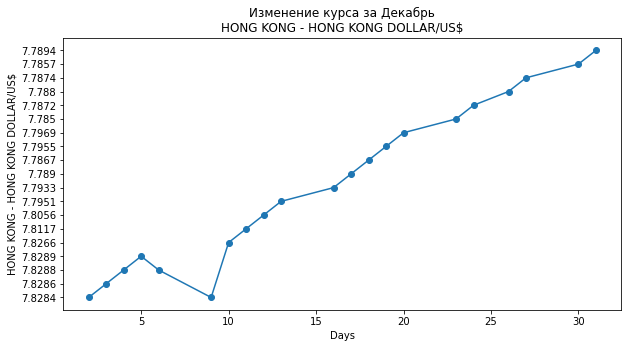

2019-12-02 = 7.8284
2019-12-31 = 7.7894
за декабрь курс укрепился на 0.50 %


<ipython-input-134-616719da80f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  December['day'] = December['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)


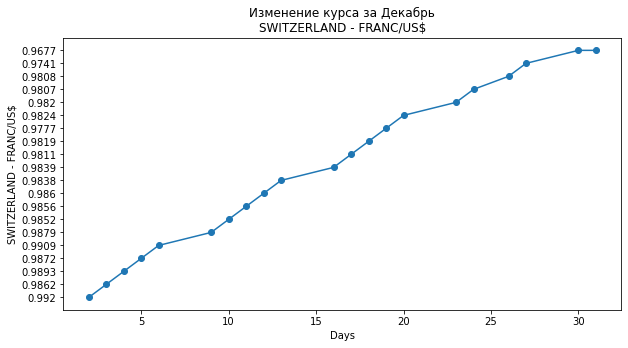

2019-12-02 = 0.992
2019-12-31 = 0.9677
за декабрь курс укрепился на 2.45 %


<ipython-input-134-616719da80f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  December['day'] = December['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)


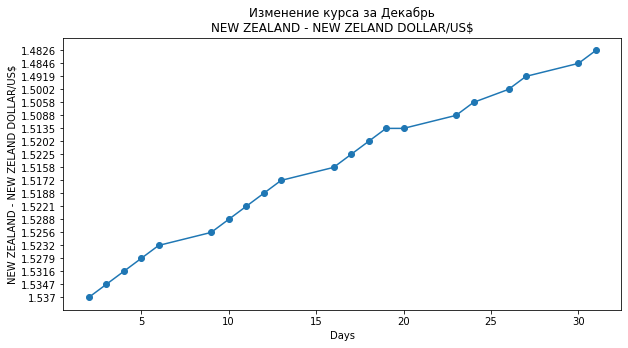

2019-12-02 = 1.537
2019-12-31 = 1.4826
за декабрь курс укрепился на 3.54 %


In [134]:
def plot_december(data, valute):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()

    without_ND = data[data[valute] != 'ND']
    December = without_ND[(without_ND['year'] == 2019) & (without_ND['month'] == 12)]
    December['day'] = December['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)

    x1 = x[(x['year'] == 2019) & (x['month'] == 12)][valute]
    days = December['day']
    ax.plot(days, x1, marker='o')
    ax.set_ylabel(valute)
    ax.set_xlabel('Days')
    ax.set_title(f'Изменение курса за Декабрь\n{valute}')
    plt.show()
    
    #  курс валюты 2000-01-03
    first = float(December[valute].iloc[0])
    date_first = December['Time Serie'].iloc[0]
    
    # курс валюты 2019-12-31
    last = float(December[valute].iloc[-1])
    date_last = December['Time Serie'].iloc[-1]
    
    # На сколько процентов выросла/упала валюта
    procentage = (first-last)/(first/100)

    print(f'{date_first} = {first}')
    print(f'{date_last} = {last}')

    if procentage > 0:
        print(f'за декабрь курс укрепился на {procentage:.2f} %')
    else:
        print(f'за декабрь курс ослаб на {procentage:.2f} %')
        
        
    
plot_december(data_2019, 'HONG KONG - HONG KONG DOLLAR/US$')
plot_december(data_2019, 'SWITZERLAND - FRANC/US$')
plot_december(data_2019, 'NEW ZEALAND - NEW ZELAND DOLLAR/US$')

In [ ]:
'''
Выводы:
По совокупности показателей следующие три валюты являются наиболее благоприятными для хранения сбережений
NEW ZEALAND - NEW ZELAND DOLLAR/US$
HONG KONG - HONG KONG DOLLAR/US$
SWITZERLAND - FRANC/US$

Так как продемонстрировали стабильный курс на протяжение 20 лет 
HONG KONG - HONG KONG DOLLAR
Изменение на 0.16% за 20 лет

Устойчивую положительную динамику в укреплении валюты 
SWITZERLAND - FRANC/US$
За 20 лет курс укрепился на 38.78 %

NEW ZEALAND - NEW ZELAND DOLLAR/US$
за 20 лет курс укрепился на 22.1 %
'''